In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import PolynomialFeatures

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("/home/harshit/Desktop/Pclub_secy/task2/lungcapacity.csv")
print(df.info())
print(df.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LungCap(cc)     736 non-null    float64
 1   Age( years)     736 non-null    float64
 2   Height(inches)  739 non-null    float64
 3   Smoke           740 non-null    object 
 4   Gender          744 non-null    object 
 5   Caesarean       742 non-null    object 
 6   No of children  746 non-null    int64  
 7   Weight (kg)     739 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 46.8+ KB
None
<bound method NDFrame.head of      LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean  \
0          6.475          6.0            62.1   NaN    male        no   
1         10.125         18.0            74.7   yes  female        no   
2          9.550         16.0            69.7    no  female       yes   
3         11.125         14.0            71.0    no    m

In [3]:
print(df.info())
print(df.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LungCap(cc)     736 non-null    float64
 1   Age( years)     736 non-null    float64
 2   Height(inches)  739 non-null    float64
 3   Smoke           740 non-null    object 
 4   Gender          744 non-null    object 
 5   Caesarean       742 non-null    object 
 6   No of children  746 non-null    int64  
 7   Weight (kg)     739 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 46.8+ KB
None
<bound method NDFrame.head of      LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean  \
0          6.475          6.0            62.1   NaN    male        no   
1         10.125         18.0            74.7   yes  female        no   
2          9.550         16.0            69.7    no  female       yes   
3         11.125         14.0            71.0    no    m

# Research Data

1. Tidal volume ​≈ 0.1*Vital capacity  and Vital Capacity ​≈ 0.8*Lung capacity

2.Tidal volume ​≈(6~8)ml /kg of body weight

In [4]:
df.drop(columns=['No of children'],inplace=True)    #it is not necessary

In [5]:
#dropping null columns for lung capacity
columns=['LungCap(cc)','Weight (kg)']
df = df.dropna(subset=columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 744
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LungCap(cc)     729 non-null    float64
 1   Age( years)     719 non-null    float64
 2   Height(inches)  729 non-null    float64
 3   Smoke           723 non-null    object 
 4   Gender          727 non-null    object 
 5   Caesarean       725 non-null    object 
 6   Weight (kg)     729 non-null    float64
dtypes: float64(4), object(3)
memory usage: 45.6+ KB


In [7]:
random_factors = np.random.uniform(6, 8, size=df.shape[0])
df['height(metres)']=df['Height(inches)']*0.0254
def calculate_ibw(gender, height):
    if gender == 'male':
        return 50 + 2.3 * (height * 39.37 - 60)  # Convert height from meters to inches
    elif gender == 'female':
        return 45.5 + 2.3 * (height * 39.37 - 60)  # Convert height from meters to inches
    else:
        return None

# Apply IBW calculation if 'gender' and 'height' columns are present
df['IBW'] = df.apply(lambda row: calculate_ibw(row['Gender'], row['height(metres)']), axis=1)

df['tidalvolume_weight']=((df['Weight (kg)']+df['IBW'])*random_factors/2)/1000       #getting ideal body weight and body weight avg and then random multiplicatiohn with no.b/w 6-8 and then convert to lites.


In [8]:
random_factors_vc=np.random.uniform(0.75,0.85,size=df.shape[0])
random_factors_tv=np.random.uniform(0.08,0.12,size=df.shape[0])
df['Vital capacity']=df['LungCap(cc)']*random_factors_vc
df['tidalvolume_lungcap']=df['Vital capacity']*random_factors_tv

In [9]:
print(df.head)

<bound method NDFrame.head of      LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean  \
0          6.475          6.0            62.1   NaN    male        no   
1         10.125         18.0            74.7   yes  female        no   
2          9.550         16.0            69.7    no  female       yes   
3         11.125         14.0            71.0    no    male        no   
4          4.800          5.0            56.9    no    male        no   
..           ...          ...             ...   ...     ...       ...   
740        9.325         14.0            65.5    no    male        no   
741        9.925         16.0            68.3    no  female        no   
742        8.725         19.0            68.4    no  female        no   
743        7.075         11.0            66.7    no    male       yes   
744        8.825         16.0            71.3   yes  female        no   

     Weight (kg)  height(metres)        IBW  tidalvolume_weight  \
0          85.70         1

In [10]:
df['finaltidalvolume']=(df['tidalvolume_lungcap']+df['tidalvolume_weight'])/2
df.drop(columns=['tidalvolume_lungcap','tidalvolume_weight','IBW','Vital capacity'],inplace=True)

In [11]:
df.isnull().sum()
df.dropna(axis=0,inplace=True)

In [12]:
print(df.describe())
print(df.head())

       LungCap(cc)  Age( years)  Height(inches)  Weight (kg)  height(metres)  \
count   707.000000   707.000000      707.000000    707.00000      707.000000   
mean      7.852733    13.729844       64.804668     62.20860        1.646039   
std       2.660532    37.325788        7.192760     13.77009        0.182696   
min       0.507000     3.000000       45.300000      0.30000        1.150620   
25%       6.137500     9.500000       59.850000     57.40000        1.520190   
50%       8.000000    13.000000       65.400000     64.60000        1.661160   
75%       9.750000    15.000000       70.400000     70.14500        1.788160   
max      14.675000   999.000000       81.800000     99.18000        2.077720   

       finaltidalvolume  
count        707.000000  
mean           0.528110  
std            0.153047  
min            0.092660  
25%            0.425207  
50%            0.526659  
75%            0.637544  
max            0.953997  
   LungCap(cc)  Age( years)  Height(inches) S

In [13]:
df.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean,Weight (kg),height(metres),finaltidalvolume
1,10.125,18.0,74.7,yes,female,no,98.75,1.89738,0.702230
2,9.550,16.0,69.7,no,female,yes,11.01,1.77038,0.460023
3,11.125,14.0,71.0,no,male,no,29.78,1.80340,0.632784
4,4.800,5.0,56.9,no,male,no,72.84,1.44526,0.438537
5,6.225,11.0,58.7,no,female,no,24.76,1.49098,0.372230


In [14]:

df['Gender'] = df['Gender'].map({'female': 0, 'male': 1})
df['Smoke'] = df['Smoke'].map({'no': 0, 'yes': 1})
df['Caesarean'] = df['Caesarean'].map({'no': 0, 'yes': 1})
df.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean,Weight (kg),height(metres),finaltidalvolume
1,10.125,18.0,74.7,1.0,0,0.0,98.75,1.89738,0.702230
2,9.550,16.0,69.7,0.0,0,1.0,11.01,1.77038,0.460023
3,11.125,14.0,71.0,0.0,1,0.0,29.78,1.80340,0.632784
4,4.800,5.0,56.9,0.0,1,0.0,72.84,1.44526,0.438537
5,6.225,11.0,58.7,0.0,0,0.0,24.76,1.49098,0.372230


# Applying ml models

In [15]:
df

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean,Weight (kg),height(metres),finaltidalvolume
1,10.125,18.0,74.7,1.0,0,0.0,98.75,1.89738,0.702230
2,9.550,16.0,69.7,0.0,0,1.0,11.01,1.77038,0.460023
3,11.125,14.0,71.0,0.0,1,0.0,29.78,1.80340,0.632784
4,4.800,5.0,56.9,0.0,1,0.0,72.84,1.44526,0.438537
5,6.225,11.0,58.7,0.0,0,0.0,24.76,1.49098,0.372230
...,...,...,...,...,...,...,...,...,...
740,9.325,14.0,65.5,0.0,1,0.0,65.50,1.66370,0.636784
741,9.925,16.0,68.3,0.0,0,0.0,68.30,1.73482,0.625555
742,8.725,19.0,68.4,0.0,0,0.0,68.40,1.73736,0.563200
743,7.075,11.0,66.7,0.0,1,1.0,66.70,1.69418,0.442801


In [16]:
def remove_outliers_zscore(df, features, z_score_threshold=3.5):
    for feature in features:
        mean_value = df[feature].mean()
        std_dev = df[feature].std()

        df[f'{feature}_z_score'] = (df[feature] - mean_value) / std_dev

        outliers = df[abs(df[f'{feature}_z_score']) > z_score_threshold]
        df = df[abs(df[f'{feature}_z_score']) <= z_score_threshold]

        print("Number of outliers removed for ",feature,":", len(outliers))
        print("Z-Score Threshold:", z_score_threshold)

    return df.drop(columns=[f'{feature}_z_score' for feature in features])

# Assuming 'df' is your DataFrame
list_of_features = df.columns.tolist()
df = remove_outliers_zscore(df, features=list_of_features, z_score_threshold=3.5)
df.info()

Number of outliers removed for  LungCap(cc) : 0
Z-Score Threshold: 3.5
Number of outliers removed for  Age( years) : 1
Z-Score Threshold: 3.5
Number of outliers removed for  Height(inches) : 0
Z-Score Threshold: 3.5
Number of outliers removed for  Smoke : 0
Z-Score Threshold: 3.5
Number of outliers removed for  Gender : 0
Z-Score Threshold: 3.5
Number of outliers removed for  Caesarean : 0
Z-Score Threshold: 3.5
Number of outliers removed for  Weight (kg) : 14
Z-Score Threshold: 3.5
Number of outliers removed for  height(metres) : 0
Z-Score Threshold: 3.5
Number of outliers removed for  finaltidalvolume : 0
Z-Score Threshold: 3.5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 1 to 744
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LungCap(cc)       690 non-null    float64
 1   Age( years)       690 non-null    float64
 2   Height(inches)    690 non-null    float64
 3   Smoke             

In [17]:
df.shape

(690, 9)

In [18]:
X=df.iloc[:,:8]
Y=df.iloc[:,-1]

In [19]:


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

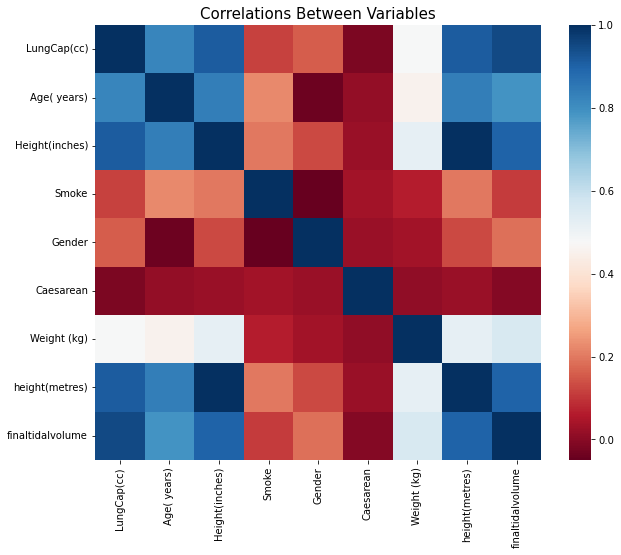

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [21]:
#caesarean almost has no effect on tidal volume
df.drop(columns=['Caesarean'],inplace=True)

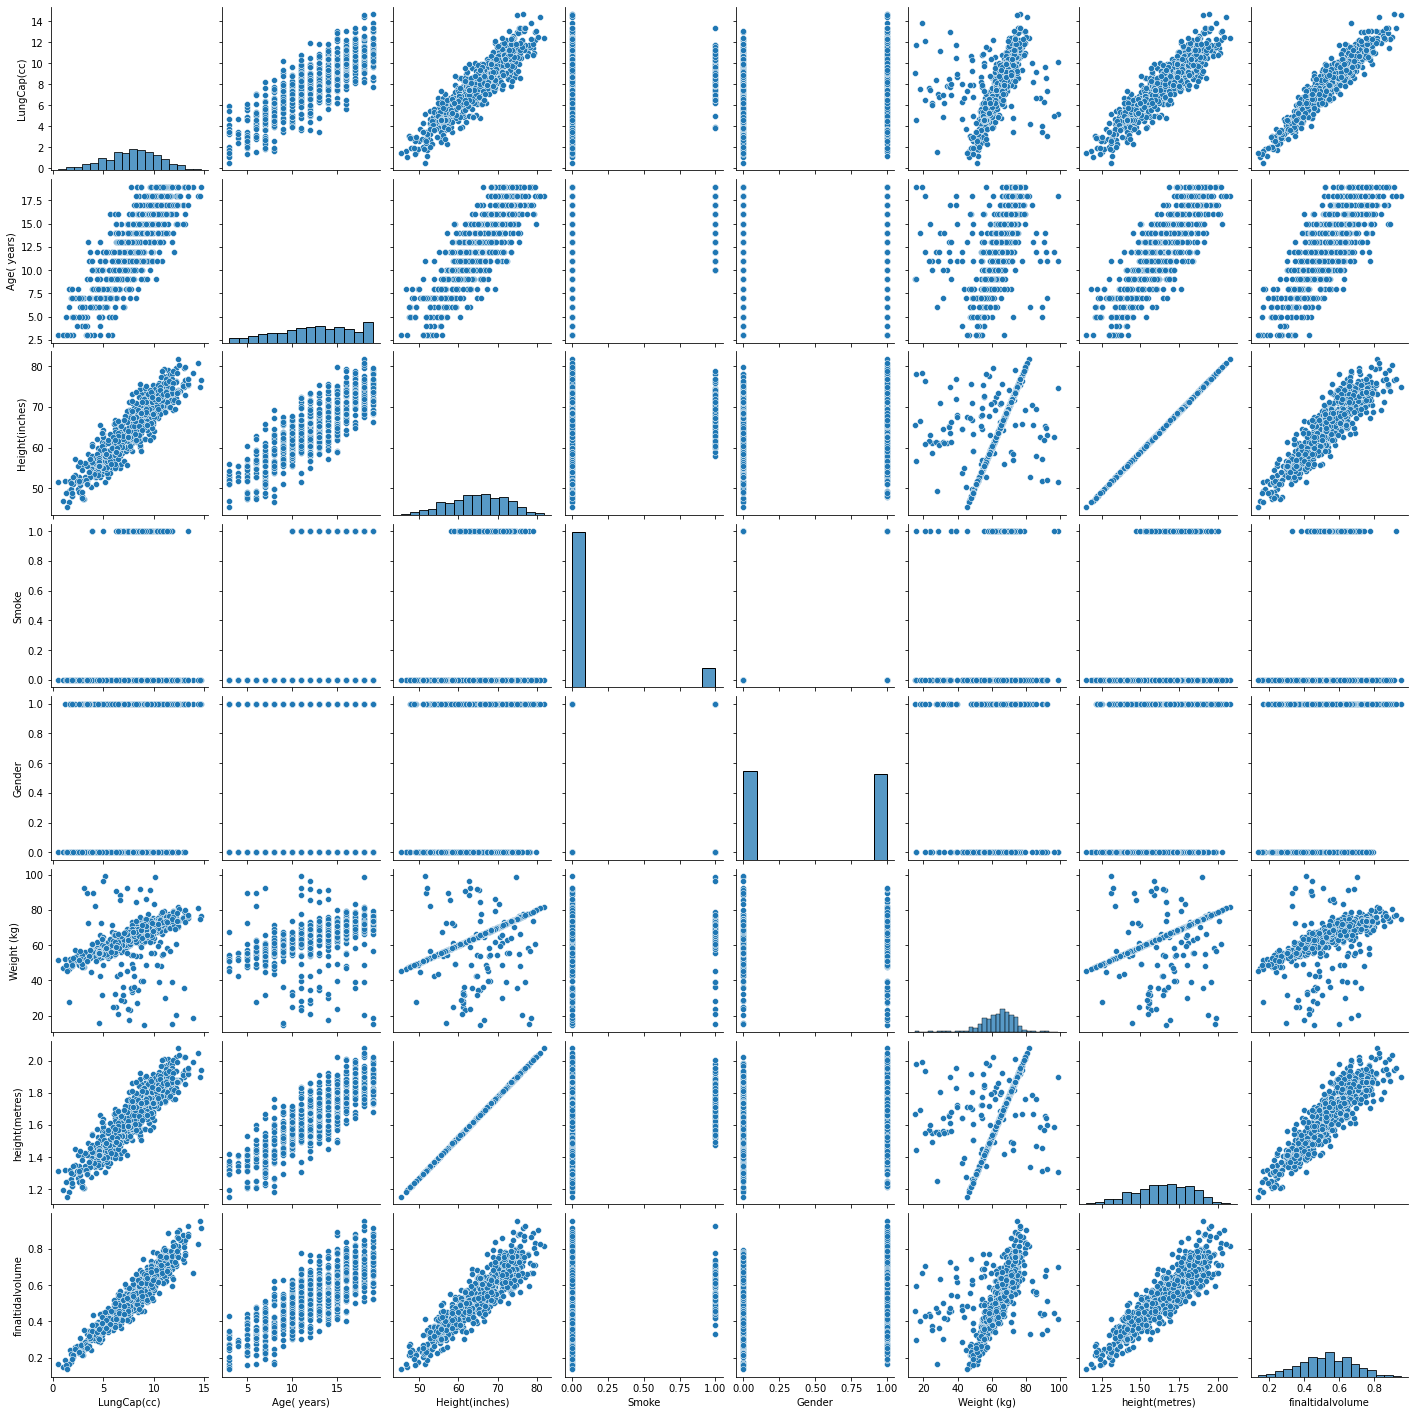

In [22]:


sns.pairplot(df.iloc[:,:])



In [23]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [24]:

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# Linear Regression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
predictions = lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)



MAE: 0.033825883931385164
MSE: 0.001799134633491789
RMSE: 0.04241620720304668
R2 Score: 0.9165245730533332
------------------------------
RMSE Cross-Validation: 0.045012938776156745


# Ridge

In [26]:
ridge = Ridge()
ridge.fit(x_train, y_train)
predictions = ridge.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)



MAE: 0.03383630625506263
MSE: 0.0017996165116517346
RMSE: 0.04242188717692477
R2 Score: 0.9165022150905722
------------------------------
RMSE Cross-Validation: 0.04502591651590382


# ElasticNet

In [27]:
elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)
predictions = elastic_net.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 0.07278280191614703
MSE: 0.0085452368925633
RMSE: 0.09244045052120474
R2 Score: 0.6035220018066616
------------------------------
RMSE Cross-Validation: 0.10286025777155003


# SVR Regressor

In [28]:


svr = SVR(C=100000)
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)



MAE: 0.0372506243454003
MSE: 0.0021858270935998414
RMSE: 0.04675282979242905
R2 Score: 0.8985829929160377
------------------------------
RMSE Cross-Validation: 0.06395282067993655


# RandomForestRegressor

In [29]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.03670610415463216
MSE: 0.002178589286731237
RMSE: 0.046675360595620864
R2 Score: 0.898918809373165
------------------------------
RMSE Cross-Validation: 0.0483988364462189


# Polynomial Regression

In [30]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(x_train)
X_test_2d = poly_reg.transform(x_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.04597981592999973
MSE: 0.005494525288824098
RMSE: 0.07412506518596863
R2 Score: 0.7450675253448493
------------------------------
RMSE Cross-Validation: 0.045012938776156745


In [31]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,0.033826,0.001799,0.042416,0.916525,0.045013
5,Polynomial Regression (degree=2),0.045980,0.005495,0.074125,0.745068,0.045013
1,Ridge,0.033836,0.001800,0.042422,0.916502,0.045026
4,RandomForestRegressor,0.036706,0.002179,0.046675,0.898919,0.048399
3,SVR,0.037251,0.002186,0.046753,0.898583,0.063953
2,ElasticNet,0.072783,0.008545,0.092440,0.603522,0.102860


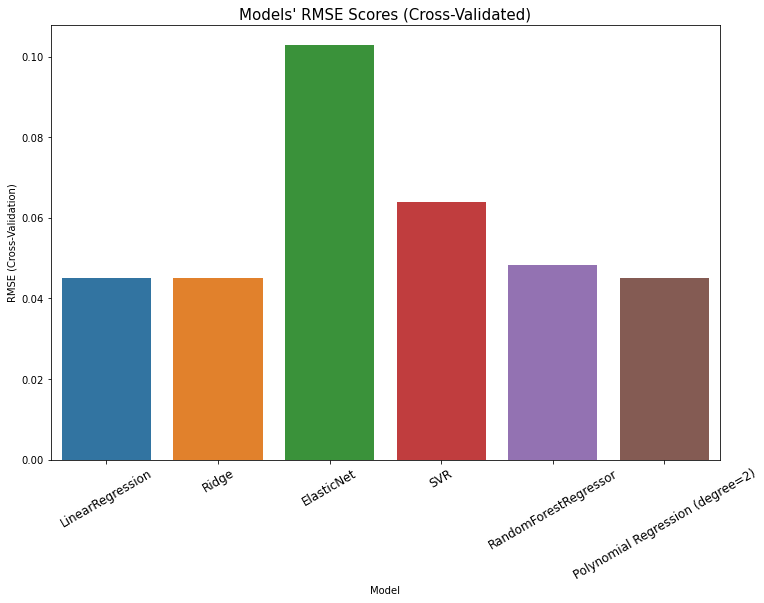

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

# Using Tensorflow for the best model i.e Linear Regression

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-05-23 01:12:27.799399: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-23 01:12:27.824087: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 01:12:27.824147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 01:12:27.824864: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-23 01:12:27.829507: I tensorflow/core/platform/cpu_feature_guar

In [34]:
model=Sequential([Dense(1,input_dim=8,activation='linear')])
model.compile(loss='mse',optimizer='adam',metrics='mse')

2024-05-23 01:12:28.709465: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [35]:
model.fit(x_train,y_train,epochs=500,verbose=1)

Epoch 1/500
18/18 [==============================] - 0s 1ms/step - loss: 40.8981 - mse: 40.8981
Epoch 2/500
18/18 [==============================] - 0s 911us/step - loss: 21.9369 - mse: 21.9369
Epoch 3/500
18/18 [==============================] - 0s 864us/step - loss: 15.1974 - mse: 15.1974
Epoch 4/500
18/18 [==============================] - 0s 826us/step - loss: 14.2067 - mse: 14.2067
Epoch 5/500
18/18 [==============================] - 0s 841us/step - loss: 14.0261 - mse: 14.0261
Epoch 6/500
18/18 [==============================] - 0s 830us/step - loss: 13.9227 - mse: 13.9227
Epoch 7/500
18/18 [==============================] - 0s 888us/step - loss: 13.7545 - mse: 13.7545
Epoch 8/500
18/18 [==============================] - 0s 753us/step - loss: 13.6266 - mse: 13.6266
Epoch 9/500
18/18 [==============================] - 0s 760us/step - loss: 13.4863 - mse: 13.4863
Epoch 10/500
18/18 [==============================] - 0s 843us/step - loss: 13.3640 - mse: 13.3640
Epoch 11/500
18/18 [=

In [36]:
predictions=model.predict(x_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

5/5 [==============================] - 0s 1ms/step
MAE: 0.0397221900003341
MSE: 0.002484894164589792
RMSE: 0.04984871276763114
R2 Score: 0.8847070155590107
------------------------------
